In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("brazilian_tax_revenue.csv", sep=';')

In [ ]:
display(df.head())

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTAÇÃO,IPI - OUTROS,...,REFIS,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS
0,2000,January,AC,231.0,0.00,292096.0,0.0,0.0,167.0,1558.0,...,0,0,0,0,20911.0,0.0,0.0,0.0,0.0,0.0
1,2000,January,AL,475088.0,33873.00,1329338.0,812470.0,0.0,141735.0,3676847.0,...,0,0,0,0,127189.0,0.0,0.0,0.0,0.0,0.0
2,2000,January,AM,11679405.0,0.00,1507146.0,1791471.0,27796.0,4414483.0,1800346.0,...,0,0,0,0,187988.0,0.0,0.0,0.0,0.0,0.0
3,2000,January,AP,24267.0,0.00,424862.0,1419.0,321.0,22333.0,12165.0,...,0,0,0,0,10769.0,0.0,0.0,0.0,0.0,0.0
4,2000,January,BA,10476457.0,0.13,5542123.0,11533707.0,0.0,7496476.0,23743858.0,...,0,0,0,0,536498.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
renameMap = {
  "Year" : "Ano",
  "Month": "Mês",
  "State": "UF",
  "Import Tax": "IMPOSTO SOBRE IMPORTAÇÃO",
  "Export Tax": "IMPOSTO SOBRE EXPORTAÇÃO",
  "Excise Tax - Tobacco": "IPI - FUMO",
  "Excise Tax - Beverages": "IPI - BEBIDAS",
  "Excise Tax - Automobiles": "IPI - AUTOMÓVEIS",
  "Excise Tax - Linked to Import": "IPI - VINCULADO À IMPORTAÇÃO",
  "Excise Tax - Others": "IPI - OUTROS",
  "Individual Income Tax": "IRPF",
  "Corporate Income Tax - Financial Entities": "IRPJ - ENTIDADES FINANCEIRAS",
  "Corporate Income Tax - Other Companies": "IRPJ - DEMAIS EMPRESAS",
  "Withholding Tax - Employment Income": "IRRF - RENDIMENTOS DO TRABALHO",
  "Withholding Tax - Capital Income": "IRRF - RENDIMENTOS DO CAPITAL",
  "Withholding Tax - Transfers Abroad": "IRRF - REMESSAS P/ EXTERIOR",
  "Withholding Tax - Other Income": "IRRF - OUTROS RENDIMENTOS",
  "Tax on Financial Transactions": "IMPOSTO S/ OPERAÇÕES FINANCEIRAS",
  "Rural Land Tax": "IMPOSTO TERRITORIAL RURAL",
  "Provisional Tax on Financial Transactions - IPMF": "IMPOSTO PROVISÓRIO S/ MOVIMENT. FINANC. - IPMF",
  "Provisional Contribution on Financial Transactions": "CPMF",
  "Contribution for Social Security Financing": "COFINS",
  "Contribution for Social Security Financing - Financial Entities": "COFINS - FINANCEIRAS",
  "Contribution for Social Security Financing - Others": "COFINS - DEMAIS",
  "Contribution to PIS/PASEP": "CONTRIBUIÇÃO PARA O PIS/PASEP",
  "Contribution to PIS/PASEP - Financial Entities": "CONTRIBUIÇÃO PARA O PIS/PASEP - FINANCEIRAS",
  "Contribution to PIS/PASEP - Others": "CONTRIBUIÇÃO PARA O PIS/PASEP - DEMAIS",
  "Social Contribution on Net Profit": "CSLL",
  "Social Contribution on Net Profit - Financial Entities": "CSLL - FINANCEIRAS",
  "Social Contribution on Net Profit - Others": "CSLL - DEMAIS",
  "CIDE-Fuels (Non-Deductible Portion)": "CIDE-COMBUSTÍVEIS (parc. não dedutível)",
  "CIDE-Fuels": "CIDE-COMBUSTÍVEIS",
  "Contribution to Social Security Plan for Public Servants": "CONTRIBUIÇÃO PLANO SEG. SOC. SERVIDORES",
  "CPSSS - Contribution to Public Servants Social Security Plan": "CPSSS - Contrib. p/ o Plano de Segurid. Social Serv. Público",
  "Contributions to FUNDAF": "CONTRIBUIÇÕES PARA FUNDAF",
  "Tax Recovery Program (REFIS)": "REFIS",
  "Special Installment Program (PAES)": "PAES",
  "Withholding at Source - Law 10.833, Art. 30": "RETENÇÃO NA FONTE - LEI 10.833, Art. 30",
  "Unified Payment": "PAGAMENTO UNIFICADO",
  "Other Administered Revenues": "OUTRAS RECEITAS ADMINISTRADAS",
  "Other Revenues": "DEMAIS RECEITAS",
  "Social Security Revenue": "RECEITA PREVIDENCIÁRIA",
  "Social Security Revenue - Own Resources": "RECEITA PREVIDENCIÁRIA - PRÓPRIA",
  "Social Security Revenue - Other Sources": "RECEITA PREVIDENCIÁRIA - DEMAIS",
  "Administered by Other Agencies": "ADMINISTRADAS POR OUTROS ÓRGÃOS"
}

In [ ]:
df.rename(columns=renameMap, inplace=True)

In [ ]:
df_sc = df[df["UF"] == "SC"]
df_sc_grouped = df_sc.groupby("Mês").sum(numeric_only=True)
columns_to_plot = [
    "IMPOSTO SOBRE IMPORTAÇÃO",
    "IMPOSTO SOBRE EXPORTAÇÃO",
    "IPI - FUMO",
    "IPI - BEBIDAS",
    "IPI - AUTOMÓVEIS"
]
plt.figure(figsize=(144, 72))

<Figure size 14400x7200 with 0 Axes>

<Figure size 14400x7200 with 0 Axes>

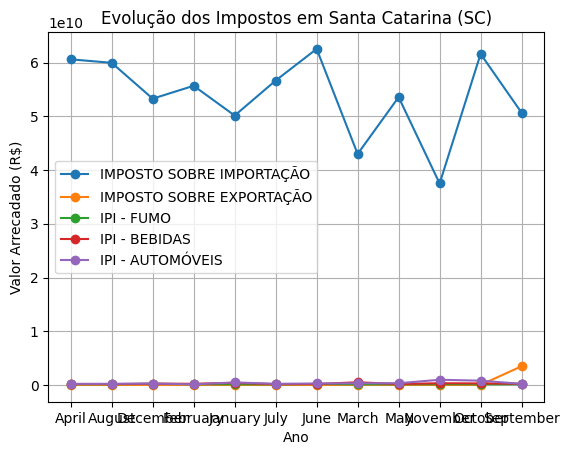

In [ ]:
for column in columns_to_plot:
    plt.plot(df_sc_grouped.index, df_sc_grouped[column], marker='o', label=column)

plt.xlabel("Mês")
plt.ylabel("Valor Arrecadado (R$)")
plt.title("Evolução dos Impostos em Santa Catarina (SC)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.to_csv("BrasilImpostos.csv")

In [ ]:
df_sc = df[df["UF"] == "SC"]
# Criar uma coluna de referência combinando Ano e Mês
df_sc["Ano-Mes"] = df_sc["Ano"].astype(str) + "-" + df_sc["Mês"]

# Agrupar por ano-mês e somar os impostos
df_sc_grouped = df_sc.groupby("Ano-Mes").sum(numeric_only=True)

<ipython-input-25-3ba6811de1b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sc["Ano-Mes"] = df_sc["Ano"].astype(str) + "-" + df_sc["Mês"]


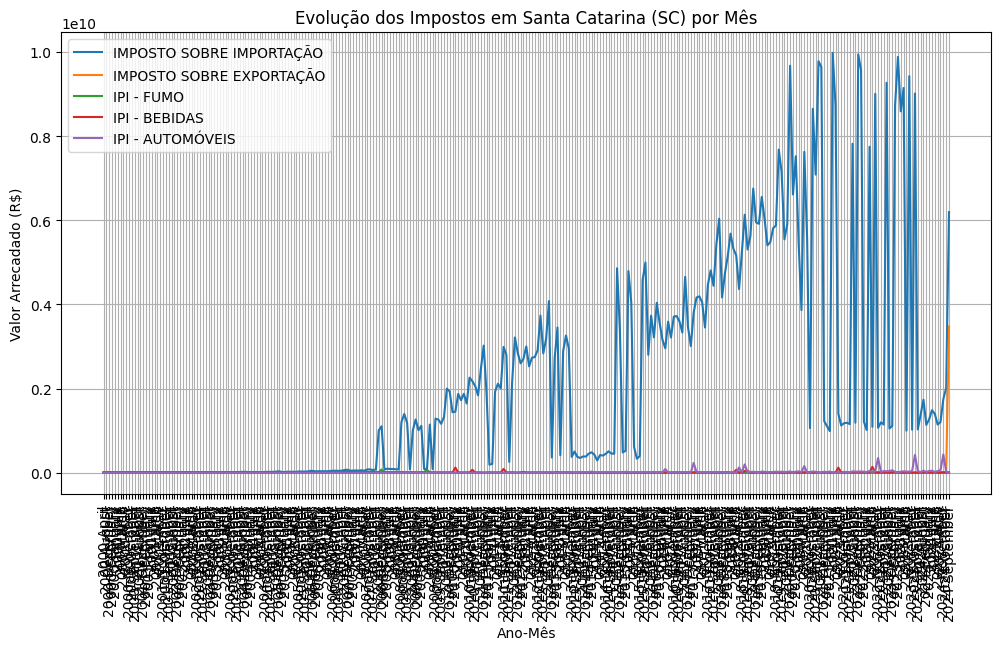

In [ ]:
plt.figure(figsize=(12, 6))

for column in columns_to_plot:
    plt.plot(df_sc_grouped.index, df_sc_grouped[column], label=column)

plt.xlabel("Ano-Mês")
plt.ylabel("Valor Arrecadado (R$)")
plt.title("Evolução dos Impostos em Santa Catarina (SC) por Mês")
plt.xticks(rotation=90)  # Rotacionar os meses para melhor visualização
plt.legend()
plt.grid(True)
plt.show()